In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
import keras_core as keras
import keras_nlp
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

print("TensorFlow version:", tf.__version__)
print("KerasNLP version:", keras_nlp.__version__)

Using TensorFlow backend
TensorFlow version: 2.10.1
KerasNLP version: 0.7.0


In [2]:
# This sample uses Keras Core, the multi-backend version of Keras.
# The selected backend is TensorFlow (other supported backends are 'jax' and 'torch')
import os
os.environ['KERAS_BACKEND'] = 'tensorflow'

Load the disaster tweets and explore the dataset

In [3]:
df_train = pd.read_csv(".//kaggle/train.csv")
df_test = pd.read_csv(".//kaggle/test.csv")

In [4]:
print("train shape",df_train.shape)
print("test_shape",df_test.shape)


train shape (7613, 5)
test_shape (3263, 4)


In [5]:
df_train.head(25)

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
5,8,NaN,NaN,#RockyFire Update => California Hwy. 20 closed...,1
6,10,NaN,NaN,#flood #disaster Heavy rain causes flash flood...,1
7,13,NaN,NaN,I'm on top of the hill and I can see a fire in...,1
8,14,NaN,NaN,There's an emergency evacuation happening now ...,1
9,15,NaN,NaN,I'm afraid that the tornado is coming to our a...,1


In [6]:
df_test.tail(25)

,id,keyword,location,text
3238,10773,wreckage,NaN,Wreckage 'Conclusively Confirmed' as From MH37...
3239,10778,wreckage,Mumbai,Wreckage 'Conclusively Confirmed' as From MH37...
3240,10781,wreckage,our galaxy,RT @australian Debris found on an Indian Ocean...
3241,10791,wrecked,Sunny Southern California,Cramer: Iger's 3 words that wrecked Disney's s...
3242,10792,wrecked,"Plymouth, England",Almost *wrecked* my van the other day because ...
3243,10796,wrecked,Deep in the heart of LibLand,'What manner of human being would parcel out a...
3244,10797,wrecked,NaN,@Nathan26_RFC thought you said Saturday night ...
3245,10801,wrecked,"Canada,Ontario",I just wanna ease your mind and make you feel ...
3246,10804,wrecked,Love Reiss,@yakubOObs think he deactivated because his no...
3247,10806,wrecked,Seattle Washington,RT CNBC '3 words from Disney CEO Bob Iger wrec...


PREPROCESS THE DATA

* istatiksel analiz

In [7]:
# Get information about the dataset
print(df_train.info())
# Summary statistics
print(df_train.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB
None
                 id      target
count   7613.000000  7613.00000
mean    5441.934848     0.42966
std     3137.116090     0.49506
min        1.000000     0.00000
25%     2734.000000     0.00000
50%     5408.000000     0.00000
75%     8146.000000     1.00000
max    10873.000000     1.00000


In [8]:
print(df_test.info())

print(df_test.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3263 entries, 0 to 3262
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        3263 non-null   int64 
 1   keyword   3237 non-null   object
 2   location  2158 non-null   object
 3   text      3263 non-null   object
dtypes: int64(1), object(3)
memory usage: 102.1+ KB
None
                 id
count   3263.000000
mean    5427.152927
std     3146.427221
min        0.000000
25%     2683.000000
50%     5500.000000
75%     8176.000000
max    10875.000000


In [9]:
print(df_train.isnull().sum())

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64


In [10]:
print(df_test.isnull().sum())

id             0
keyword       26
location    1105
text           0
dtype: int64


* görselleştirme


* anomali belirleme

* Korelasyonları İnceleme:



In [11]:
df_train.dropna(subset=['keyword'], inplace=True)

In [12]:
from sklearn.preprocessing import LabelEncoder
# Instantiate LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the 'keyword' column
df_train['keyword_numerical'] = label_encoder.fit_transform(df_train['keyword'])

In [13]:
# Fit and transform the 'text' column
df_train['text_numerical'] = label_encoder.fit_transform(df_train['text'])

In [14]:
# Calculate the correlation between 'text_numerical' and 'target'
correlation = df_train['text_numerical'].corr(df_train['keyword_numerical'])

print(f"Pearson Correlation between 'keyword_numerical' and 'text_numerical': {correlation}")

Pearson Correlation between 'keyword_numerical' and 'text_numerical': 0.047210635436251945


* Özellik Mühendisliği İmkanları:

In [15]:
df_train.head()

,id,keyword,location,text,target,keyword_numerical,text_numerical
31,48,ablaze,Birmingham,@bbcmtd Wholesale Markets ablaze http://t.co/l...,1,0,1679
32,49,ablaze,Est. September 2012 - Bristol,We always try to bring the heavy. #metal #RT h...,0,0,6645
33,50,ablaze,AFRICA,#AFRICANBAZE: Breaking news:Nigeria flag set a...,1,0,19
34,52,ablaze,"Philadelphia, PA",Crying out for more! Set me ablaze,0,0,2874
35,53,ablaze,"London, UK",On plus side LOOK AT THE SKY LAST NIGHT IT WAS...,0,0,5023


* Kategorik Değişken Analizi:



In [16]:
frequency_table = pd.value_counts(df_train['keyword'])
frequency_table

fatalities               45
deluge                   42
armageddon               42
sinking                  41
damage                   41
                         ..
forest%20fire            19
epicentre                12
threat                   11
inundation               10
radiation%20emergency     9
Name: keyword, Length: 221, dtype: int64

In [17]:
frequency_table = pd.value_counts(df_train['target'])
frequency_table

0    4323
1    3229
Name: target, dtype: int64

* Eksik Veri Analizi:



<Figure size 500x500 with 0 Axes>

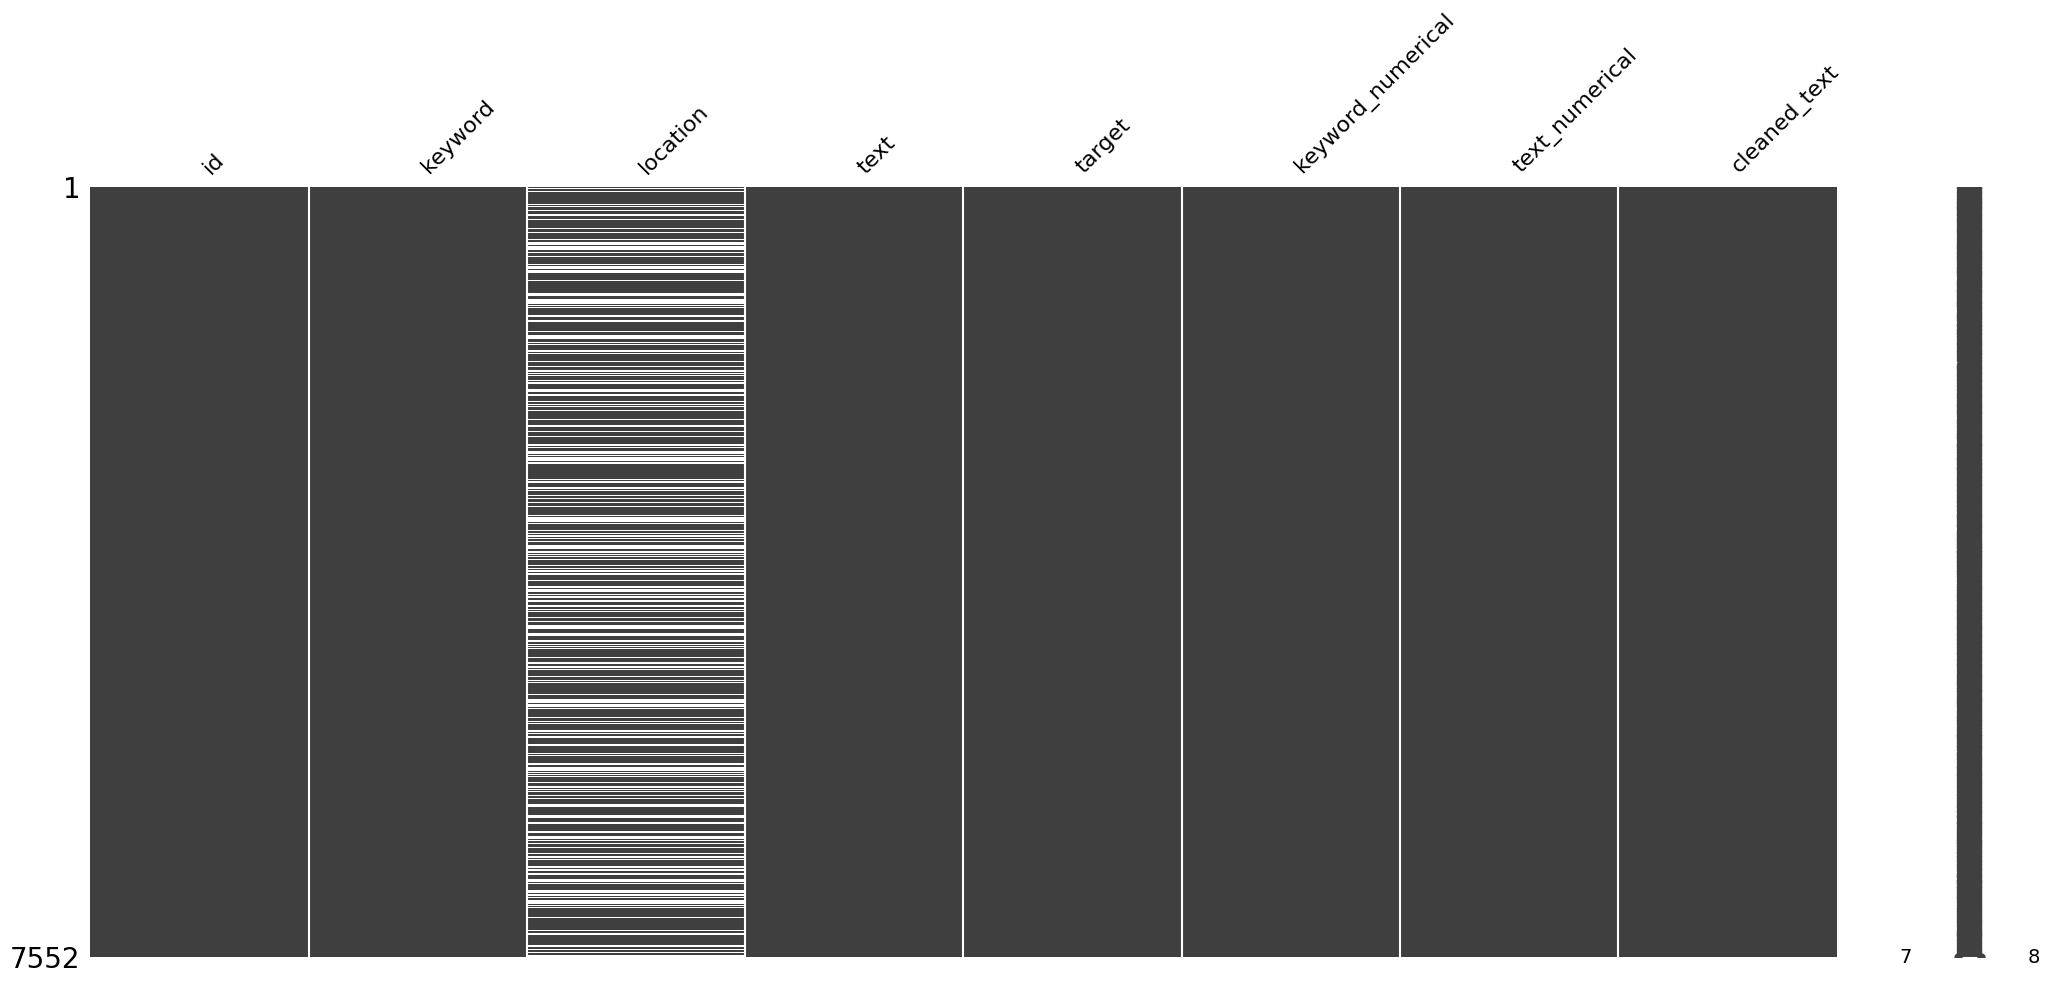

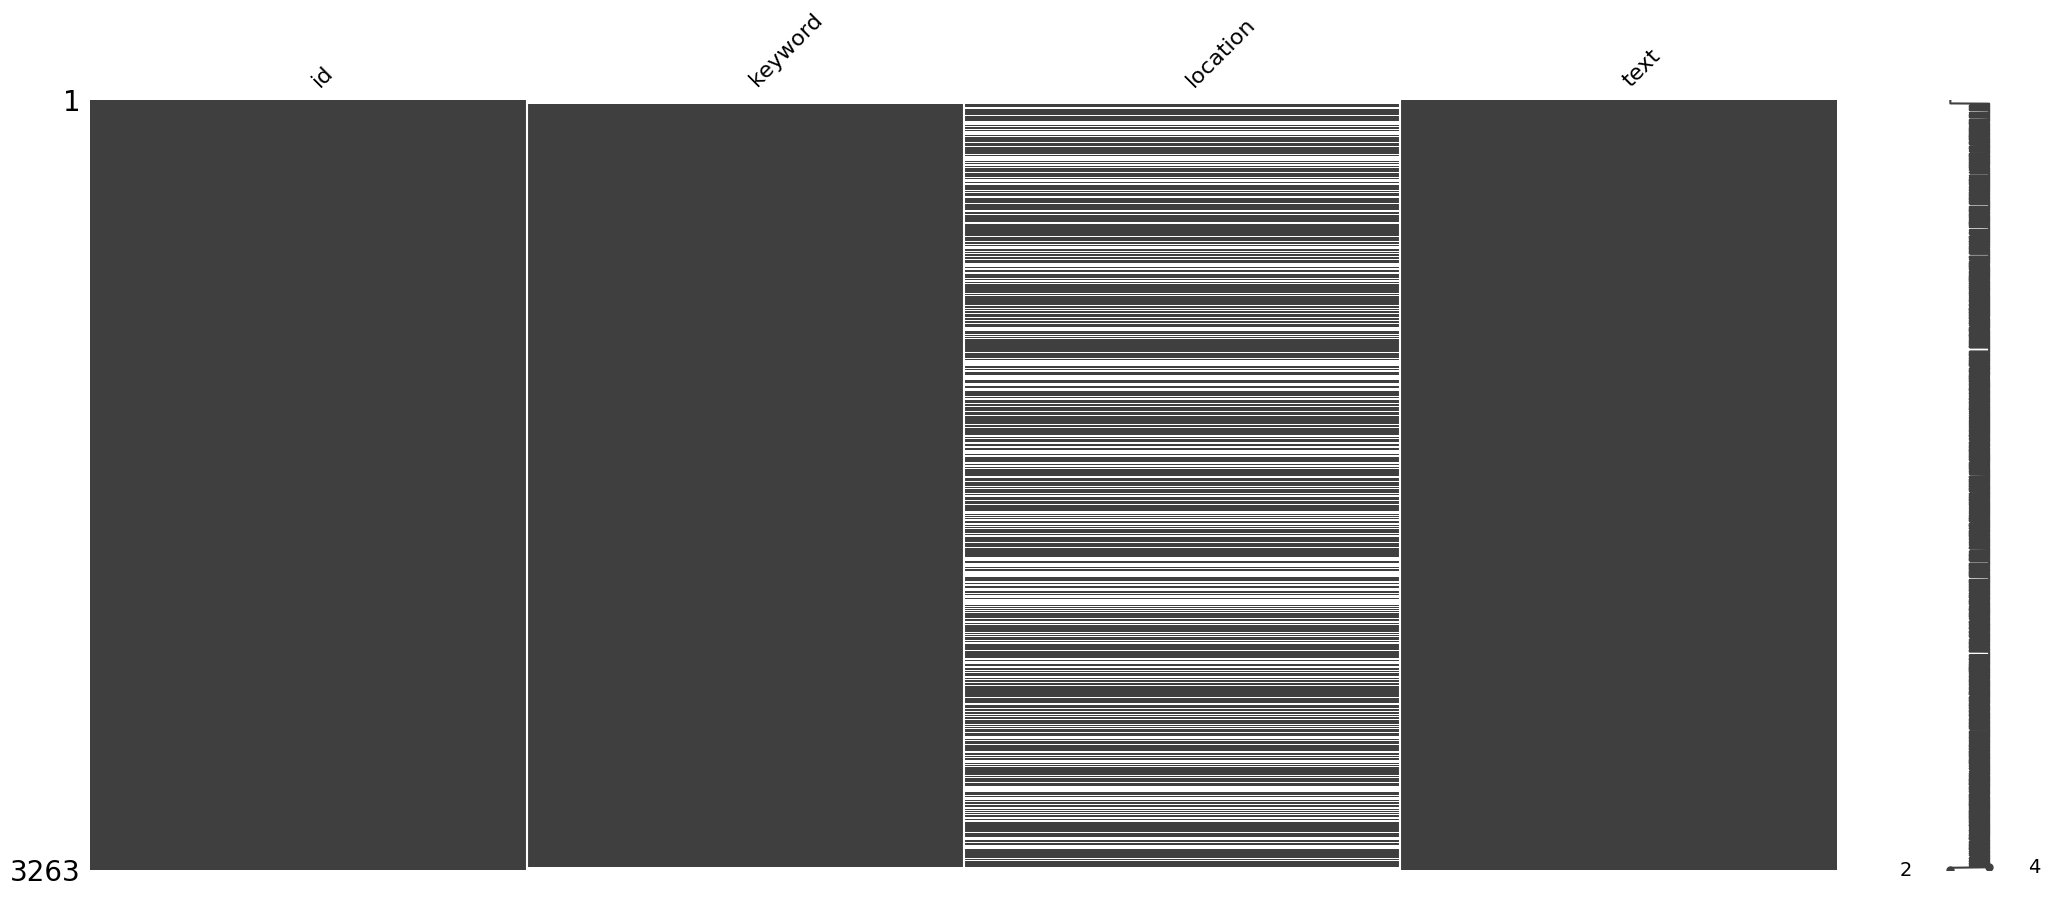

In [25]:

# Görüntü boyutunu ayarla
plt.figure(figsize=(5,5))

# msno.matrix fonksiyonunu çağır
msno.matrix(df_train)
msno.matrix(df_test)
# Görüntüyü göster
plt.show()

LOAD A DISTILBERT MODEL, FROM KERAS NLP

TRAIN MODEL, FINE-TUNING BERT

GENERATE THE SUBMISSION FILE

In [21]:
df_train.head(25)

,id,keyword,location,text,target,keyword_numerical,text_numerical
31,48,ablaze,Birmingham,@bbcmtd Wholesale Markets ablaze http://t.co/l...,1,0,1679
32,49,ablaze,Est. September 2012 - Bristol,We always try to bring the heavy. #metal #RT h...,0,0,6645
33,50,ablaze,AFRICA,#AFRICANBAZE: Breaking news:Nigeria flag set a...,1,0,19
34,52,ablaze,"Philadelphia, PA",Crying out for more! Set me ablaze,0,0,2874
35,53,ablaze,"London, UK",On plus side LOOK AT THE SKY LAST NIGHT IT WAS...,0,0,5023
36,54,ablaze,Pretoria,@PhDSquares #mufc they've built so much hype a...,0,0,1362
37,55,ablaze,World Wide!!,INEC Office in Abia Set Ablaze - http://t.co/3...,1,0,4066
38,56,ablaze,NaN,Barbados #Bridgetown JAMAICA ÛÒ Two cars set ...,1,0,2496
39,57,ablaze,Paranaque City,Ablaze for you Lord :D,0,0,2253
40,59,ablaze,Live On Webcam,Check these out: http://t.co/rOI2NSmEJJ http:/...,0,0,2750


In [41]:
import nltk
from nltk.corpus import stopwords
import string
import re
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import TweetTokenizer

nltk.download('stopwords')

def preprocess_text(text):

    
    lemma=WordNetLemmatizer()
    text = re.sub(r'#RT', '', text)
    text =re.sub(r'https?://[^\s]+', '', text)
    text = re.sub(r'#', '', text)
    
    text=text.lower()
    tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True,
                               reduce_len=True)
    tweet_tokens = tokenizer.tokenize(text)
    
    # Remove stop words using NLTK
    stop_words = set(stopwords.words('english'))
    tweets_clean = []
    for word in tweet_tokens:
        if (word not in stop_words and 
                word not in string.punctuation):

                stem_word =lemma.lemmatize(word)
                tweets_clean.append(stem_word)

    cleaned_text = ' '.join(tweets_clean)
    return cleaned_text


df_train['cleaned_text'] = df_train['text'].apply(preprocess_text)

print(df_train[['text', 'cleaned_text']].head())

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\esman\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


                                                 text  \
31  @bbcmtd Wholesale Markets ablaze http://t.co/l...   
32  We always try to bring the heavy. #metal #RT h...   
33  #AFRICANBAZE: Breaking news:Nigeria flag set a...   
34                 Crying out for more! Set me ablaze   
35  On plus side LOOK AT THE SKY LAST NIGHT IT WAS...   

                                         cleaned_text  
31                            wholesale market ablaze  
32                       always try bring heavy metal  
33  africanbaze breaking news nigeria flag set abl...  
34                                     cry set ablaze  
35               plus side look sky last night ablaze  


In [42]:
df_train.head()

,id,keyword,location,text,target,keyword_numerical,text_numerical,cleaned_text
31,48,ablaze,Birmingham,@bbcmtd Wholesale Markets ablaze http://t.co/l...,1,0,1679,wholesale market ablaze
32,49,ablaze,Est. September 2012 - Bristol,We always try to bring the heavy. #metal #RT h...,0,0,6645,always try bring heavy metal
33,50,ablaze,AFRICA,#AFRICANBAZE: Breaking news:Nigeria flag set a...,1,0,19,africanbaze breaking news nigeria flag set abl...
34,52,ablaze,"Philadelphia, PA",Crying out for more! Set me ablaze,0,0,2874,cry set ablaze
35,53,ablaze,"London, UK",On plus side LOOK AT THE SKY LAST NIGHT IT WAS...,0,0,5023,plus side look sky last night ablaze


train test split

In [ ]:
x=df_train['cleaned_text']
y=df_train['target']

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(x, y, test_size=0.3, random_state=42)
x_test=df_test['cleaned_text']
